In [1]:
from MagDipoleApp import MagneticDipoleApp
mag = MagneticDipoleApp()

# Magnetic Dipole Applet
## Purpose

The objective is to learn about the magnetic field observed at the ground's surface, caused by a small buried dipolar magnet. In geophysics, this simulates the observed anomaly over a buried susceptible sphere that is magnetized by the Earth's magnetic field.

## What is shown

- <b>The colour map</b> shows the strength of the chosen parameter (Bt, Bx, By, Bz, or Bg) as a function of position.

- Imagine doing a two dimensional survey over a susceptible sphere that has been magentized by the Earth's magnetic field specified by inclination and declination.  "Measurement" location is the centre of each coloured box. This is a simple (but easily programmable) alternative to generating a smooth contour map.

- The anomaly depends upon magnetic latitude, direction of the inducing (Earth's) field, the depth of the buried dipole, and the magnetic moment of the buried dipole.


## Important Notes:

- <b>Inclination (I)</b> and <b>declination (D)</b> describe the orientation of the Earth's ambient field at the centre of the survey area. Positive inclination implies you are in the northern hemisphere, and positive declination implies that magnetic north is to the east of geographic north.

- The <b>"length"</b> adjuster changes the size of the square survey area. The default of 72 means the survey square is 72 metres on a side.

- The <b>"data spacing"</b> adjuster changes the distance between measurements. The default of 1 means measurements were acquired over the survey square on a 2-metre grid. In other words, "data spacing = 2" means each coloured box is 2 m square.

- The <b>"depth"</b> adjuster changes the depth (in metres) to the centre of the buried dipole.

- The <b>"magnetic moment (M)"</b> adjuster changes the strength of the induced field. Units are Am2.  This is related to the strength of the inducing field, the susceptibility of the buried sphere, and the volume of susceptible material.
- <b>Bt, Bg, Bx, By, Bz</b> are Total field, X-component (positive northwards), Y-component (positive eastwards), and Z-component (positive down) of the anomaly field respectively.

- Checking the <b>fixed scale</b> button fixes the colour scale so that the end points of the colour scale are minimum and maximum values for the current data set.

- You can generate a <b>profile</b> along either "East" or "North" direction

- Check <b>half width</b> to see the half width of the anomaly. Anomaly width is noted on the botton of the graph.

- Measurements are taken 1m above the surface.

- For gradient data (<b>Bg</b>), measurements are taken at 1m and 2m

- Note that magnetic moment (M) for monopole is equal to the charge (Q):

In [2]:
mag.interact_plot_model_dipole()

In [3]:
from LinearInversionDirect import LinearInversionDirectApp
from ipywidgets import interact, FloatSlider, ToggleButtons, IntSlider, FloatText, IntText

In [4]:
app = LinearInversionDirectApp()

# Linear Inversion App

This app is based upon the inversion tutorial: "INVERSION FOR APPLIED GEOPHYSICS" by Oldenburg and Li (2005).

Douglas W. Oldenburg and Yaoguo Li (2005) 5. Inversion for Applied Geophysics: A Tutorial. Near-Surface Geophysics: pp. 89-150.
eISBN: 978-1-56080-171-9
print ISBN: 978-1-56080-130-6
https://doi.org/10.1190/1.9781560801719.ch5

## Purpose

By using a simple decaying and oscillating kernel function, which emulates the physics of electromagnetic (EM) survey, we understand basic concepts of inverting data. Three items that we are going to explore are:

- Step1: Create a model ($\mathbf{m}$)
- Step2: Generate a sensitivity kernel (or matrix), $\mathbf{G}$
- Step3: Simulate data ($\mathbf{d} = \mathbf{G}\mathbf{m}$)
- Step4: All three steps together
- Step5: Invert the data, and explore inversion results

## Forward problem


Let $g_j(x)$ denote the kernel function for $j$th datum. With a given model $m(x)$, $j$th datum can be computed by solving following integral equation:

 $$ d_j = \int_a^{b} g_j(x) m(x) dx $$

where

$$ g_j(x) = e^{p_jx} cos (2 \pi q_jx) $$

By discretizing $g_j(x)$ we obtain

 $$ \mathbf{g}_j(\mathbf{x}) = e^{p_j\mathbf{x}} cos (2 \pi q_j \mathbf{x})$$

where

- $\mathbf{g}_j$: $j$th row vector for the sensitivty matrix ($1 \times M$)
- $\mathbf{x}$: model location ($1 \times M$)
- $p_j$: decaying constant (<0)
- $q_j$: oscillating constant (>0)

By stacking multiple rows of $\mathbf{g}_j$, we obtain sensitivity matrix, $\mathbf{G}$:

\begin{align}
    \mathbf{G} =
    \begin{bmatrix}
        \mathbf{g}_1\\
        \vdots\\
        \mathbf{g}_{N}
    \end{bmatrix}
\end{align}

Here, the size of the matrix $\mathbf{G}$ is $(N \times M)$.
Finally data, $\mathbf{d}$, can be written as a linear equation:

$$ \mathbf{d} = \mathbf{G}\mathbf{m}$$

where $\mathbf{m}$ is an inversion model; this is a column vector ($M \times 1$).

In real measurments, there will be various noises source, and hence observation, $\mathbf{d}^{obs}$, can be written as

$$ \mathbf{d}^{obs} = \mathbf{G}\mathbf{m} + \mathbf{noise}$$

##  Step1: Create a model, $\mathbf{m}$

The model $m$ is a function defined on the interval (-2,2). Here we generate a model that is the sum of a: (a) background $m_{ref}$, (b) box car $m_1$ and (c) Gaussian $m_2$. The box car is defined by
- m$_{background}$ : amplitude of the background
- m$1$ : amplitude
- m$1_{center}$ : center
- m$1_{width}$ : width the Gaussian is defined by
- m$2$ : amplitude
- m$2_{center}$ : center
- m$2_{sigma}$ : width of Gaussian (as defined by a standard deviation)
- M: # of model parameters

In [5]:
Q_model = app.interact_plot_model()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='m$_{background}$', max=2.0,…

##  Step2: Generate a sensitivity kernel (or matrix), $\mathbf{G}$

By using the following app, we explore each row vector of the sensitivity matrix, $\mathbf{g}_j$. Parameters of the apps are:

- M: # of model parameters
- N: # of data
- p: decaying constant (<0)
- q: oscillating constant (>0)
- ymin: maximum limit for y-axis
- ymax: minimum limit for y-axis
- show_singular: show singualr values

In [6]:
Q_kernel = app.interact_plot_G()

interactive(children=(IntSlider(value=20, continuous_update=False, description='N', min=1), IntSlider(value=10…

## Step3: Simulate data

The $j$-th datum is the inner product of the $j$-th kernel $g_j(x)$ and the model $m(x)$. In discrete form it can be written as the dot product of the vector $g_j$ and the model vector $m$.

### $$ d_j = \mathbf{g}_j \mathbf{m} $$

If there are $N$ data, these data can be written as a column vector, $\mathbf{d}$:

\begin{align}
    \mathbf{d} = \mathbf{G}\mathbf{m} =
    \begin{bmatrix}
        d_1\\
        \vdots\\
        d_{N}
    \end{bmatrix}
\end{align}

### Adding Noise

Observational data are always contaminated with noise. Here we add Gaussian noise $N(0,\epsilon)$ (zero mean and standard deviation $\sigma$). Here we choose

$$ \epsilon = \% |d| + \text{floor} $$

In [7]:
Q_data = app.interact_plot_data()

interactive(children=(Checkbox(value=False, description='add_noise'), FloatText(value=0.0, description='percen…

In [8]:
app.interact_plot_all_three_together()

## Inverse Problem

In the inverse problem we attempt to find the model $\mathbf{m}$ that gave rise to the observational data $\mathbf{d}^{obs}$. The inverse problem is formulated as an optimization problem:


$$\text{minimize} \ \ \ \phi(\mathbf{m}) = \phi_d(\mathbf{m}) + \beta \phi_m(\mathbf{m}) $$

where

- $\phi_d$: data misfit
- $\phi_m$: model regularization
- $\beta$: trade-off (or Tikhonov) parameter  $0<\beta<\infty$

Data misfit is defined as

$$ \phi_d = \sum_{j=1}^{N}\Big(\frac{\mathbf{g}_j\mathbf{m}-d^{obs}_j}{\epsilon_j}\Big)^2$$

where $\epsilon_j$  is an estimate of the standard deviation of the $j$th datum.


The model regularization term, $\phi_m$, can be written as

$$ \phi_m(\mathbf{m}) = \alpha_s \int (\mathbf{m}-\mathbf{m}_{ref}) dx + \alpha_x \int (\frac{d \mathbf{m}}{dx}) dx$$

The first term is referred to as the "smallness" term. Minimizing this generates a model that is close to a reference model $m_{ref}$. The second term penalizes roughness of the model. It is generically referred to as a "flattest" or "smoothness" term.  

## Step5: Invert the data, and explore inversion results

In the inverse problem we define parameters needed to evaluate the data misfit and the model regularization terms. We then deal with parameters associated with the inversion.

### Parameters

- `mode`: `Run` or `Explore`
    - `Run`: Each click of the app, will run `n_beta` times of inversion
    - `Explore`: Not running inversions, but explore result of the inversions


- `noise option`: `error contaminated` or `clean data`

#### Misfit
- `percent`: percentage of the uncertainty (%)

- `floor`: floor of the uncertainty (%)

- `chifact`: chi factor for stopping criteria (when $\phi_d^{\ast}=N \rightarrow$ `chifact=1`)

#### Model norm
- `mref`: reference model

- `alpha_s`: $\alpha_s$ for smallness

- `alpha_x`: $\alpha_x$ for smoothness

#### Beta
- `beta_min`: minimum $\beta$

- `beta_max`: maximum $\beta$

- `n_beta`: the number of $\beta$

#### Plotting options

- `data`: `obs & pred` or `normalized misfit`
    - `obs & pred`: show observed and predicted data
    - `normalized misfit`: show normalized misfit


- `tikhonov`: `phi_d & phi_m` or `phi_d vs phi_m`
    - `phi_d & phi_m`: show $\phi_d$ and $\phi_m$ as a function of $\beta$
    - `phi_d vs phi_m`: show tikhonov curve
    
- `i_beta`: i-th $\beta$ value

- `scale`: `linear` or `log`
    - `linear`: linear scale for plotting the third panel
    - `log`: log scale for plotting the third panel

In [9]:
app.interact_plot_inversion()

## Import modules




In [10]:
%matplotlib inline
import matplotlib
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile

from discretize import TensorMesh
from discretize.utils import mesh_builder_xyz

from SimPEG.potential_fields import magnetics
from SimPEG import dask
from SimPEG.utils import plot2Ddata, surface2ind_topo
from SimPEG import (
    maps,
    data,
    inverse_problem,
    data_misfit,
    regularization,
    optimization,
    directives,
    inversion,
    utils,
)
import pandas as pd
from ipywidgets import widgets, interact

## Load Data and Plot

In [11]:
def read_ubc_magnetic_data(data_filename):
    with open(data_filename, 'r') as f:
        lines = f.readlines()
    tmp = np.array(lines[0].split()[:3]).astype(float)
    n_data = int(float(lines[2].split()[0]))
    meta_data = {}
    meta_data['inclination'] = float(tmp[0])
    meta_data['declination'] = float(tmp[1])
    meta_data['b0'] = float(tmp[2])
    meta_data['n_data'] = n_data
    data = np.zeros((n_data, 5), order='F')
    for i_data in range(n_data):
        data[i_data,:] = np.array(lines[3+i_data].split()).astype(float)
    df = pd.DataFrame(data=data, columns=['x', 'y', 'z', 'data', 'data_error'])
    return df, meta_data

In [12]:
data_filename = "./data/obs.mag"
df, meta_data = read_ubc_magnetic_data(data_filename)

In [13]:
meta_data

{'inclination': 83.0, 'declination': -32.0, 'b0': 60000.0, 'n_data': 1638}

In [14]:
df.head(3)

,x,y,z,data,data_error
0,509.0,42958.0,40.0,42.90,5.8580
1,504.0,42858.0,40.0,88.32,6.7664
2,499.3,42758.0,40.0,86.11,6.7222


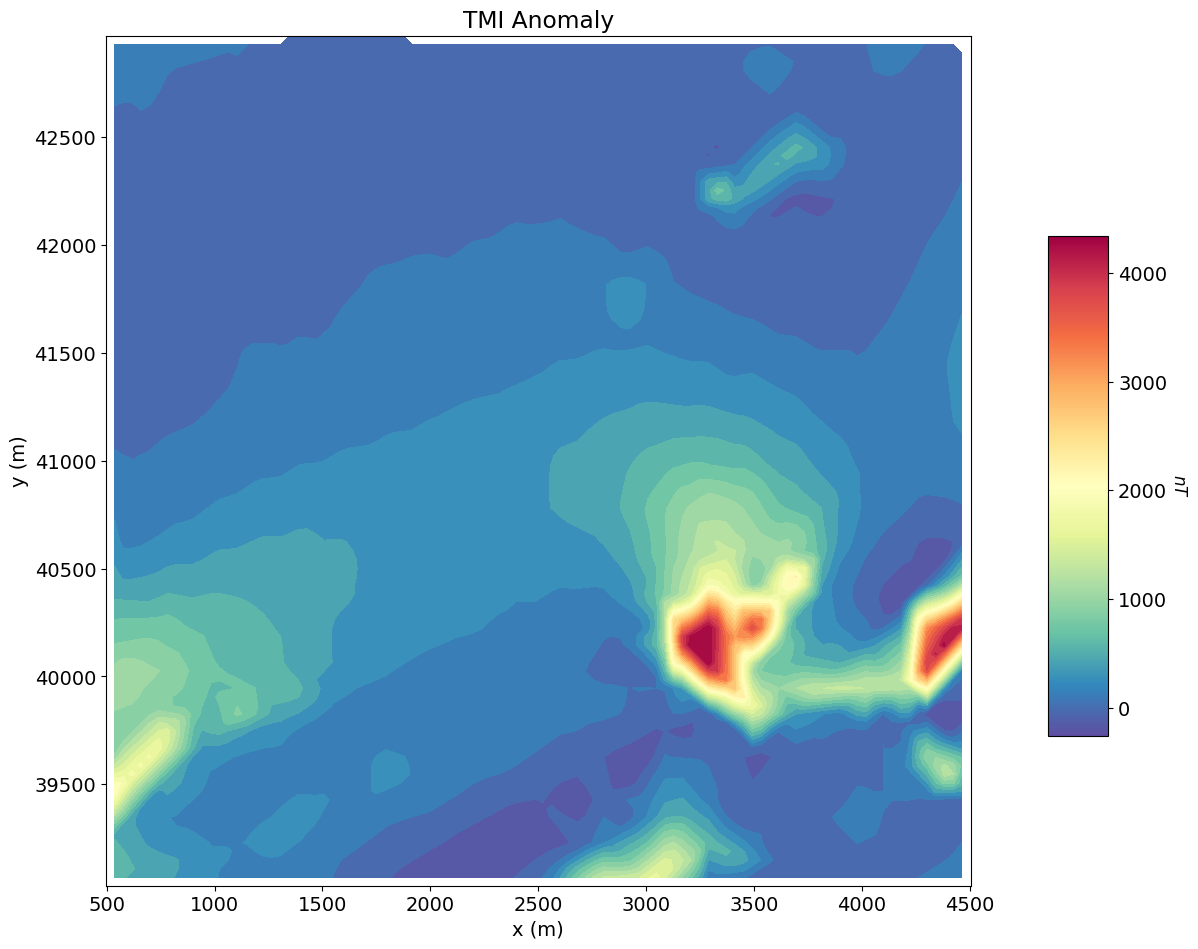

In [15]:
# Down sample the data
matplotlib.rcParams['font.size'] = 14
nskip = 2
receiver_locations = df[['x', 'y', 'z']].values[::nskip,:]
xyz_topo = np.c_[receiver_locations[:,:2], np.zeros(receiver_locations.shape[0])]
dobs = df['data'].values[::nskip]
# Plot
fig = plt.figure(figsize=(12, 10))
vmin, vmax = np.percentile(dobs, 0.5), np.percentile(dobs, 99.5)
tmp = np.clip(dobs, vmin, vmax)
ax1 = fig.add_axes([0.1, 0.1, 0.75, 0.85])
plot2Ddata(
    receiver_locations,
    tmp,
    ax=ax1,
    ncontour=30,
    clim=(vmin-5, vmax+5),
    contourOpts={"cmap": "Spectral_r"},
)
ax1.set_title("TMI Anomaly")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")

ax2 = fig.add_axes([0.9, 0.25, 0.05, 0.5])

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = mpl.colorbar.ColorbarBase(
    ax2, norm=norm, orientation="vertical", cmap=mpl.cm.Spectral_r
)
cbar.set_label("$nT$", rotation=270, labelpad=15, size=12)

plt.show()

## Assign Uncertainty

Inversion with SimPEG requires that we define data error i.e., standard deviation on the observed data.
This represents our estimate of the noise in our data.
For this magnetic inversion, 2% relative error and a noise floor of 2 nT are assigned.

In [16]:
standard_deviation = 0.02 * abs(dobs) + 2

## Defining the Survey

Here, we define a survey object that will be used for the simulation.
The user needs an (N, 3) array to define
the xyz locations of the observation locations and the list of field components
which are to be modeled and the properties of the Earth's field.

In [17]:
# Define the component(s) of the field we are inverting as a list. Here we will
# Invert total magnetic intensity data.
components = ["tmi"]

# Use the observation locations and components to define the receivers. To
# simulate data, the receivers must be defined as a list.
receiver_list = magnetics.receivers.Point(receiver_locations, components=components)

receiver_list = [receiver_list]

# Define the inducing field H0 = (intensity [nT], inclination [deg], declination [deg])
inclination = meta_data['inclination']
declination = meta_data['declination']
strength = meta_data['b0']
inducing_field = (strength, inclination, declination)

source_field = magnetics.sources.UniformBackgroundField(
    receiver_list=receiver_list, parameters=inducing_field
)

# Define the survey
survey = magnetics.survey.Survey(source_field)

## Defining the Data

Here is where we define the data that is inverted. The data is defined by
the survey, the observation values and the standard deviations.




In [18]:
data_object = data.Data(survey, dobs=dobs, standard_deviation=standard_deviation)

## Defining a Tensor Mesh

Here, we create the tensor mesh that will be used to invert TMI data.
If desired, we could define an OcTree mesh.

In [19]:
dx = 100
dy = 100
dz = 100
depth_core = 1000
padding_distance_x_left = 1000
padding_distance_x_right = 1000
padding_distance_y_left = 1000
padding_distance_y_right= 1000
padding_distance_z_lower = 1000
padding_distance_z_upper = 0
mesh = mesh_builder_xyz(
    xyz=xyz_topo,
    h=[dx, dy, dz],
    depth_core=depth_core,
    padding_distance=[
        [padding_distance_x_left, padding_distance_x_right],
        [padding_distance_y_left, padding_distance_y_right],
        [padding_distance_z_lower, padding_distance_z_upper]
    ]
)

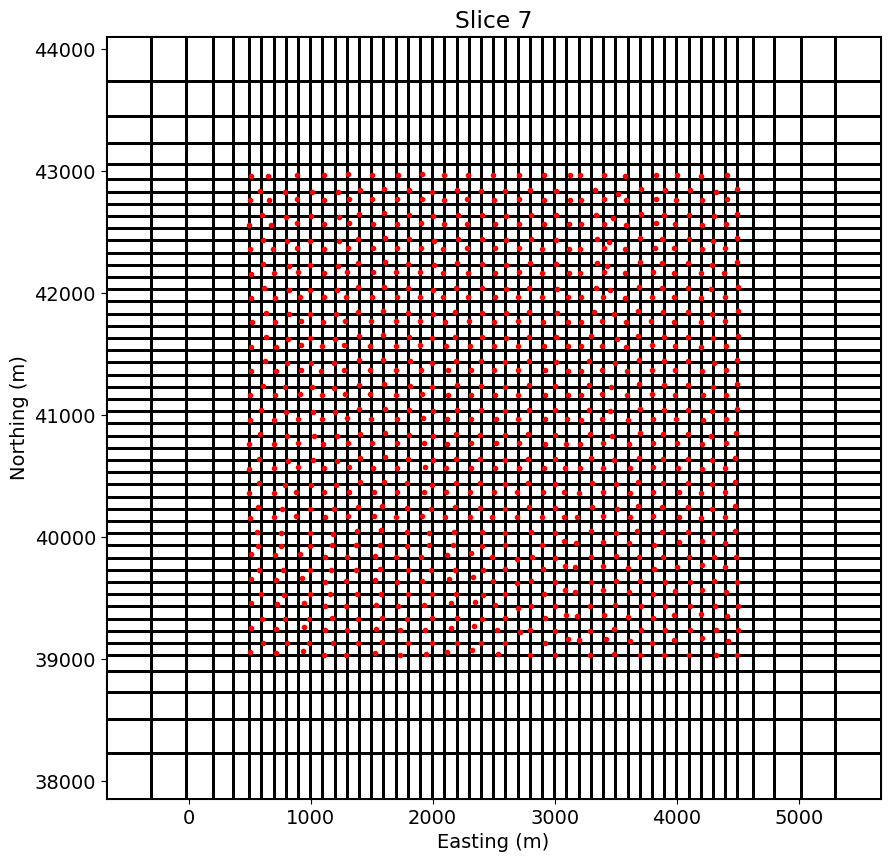

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mesh.plotSlice(np.ones(mesh.nC)*np.nan, ax=ax, grid=True)
ax.plot(receiver_locations[:,0], receiver_locations[:,1], 'r.')
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_aspect(1)

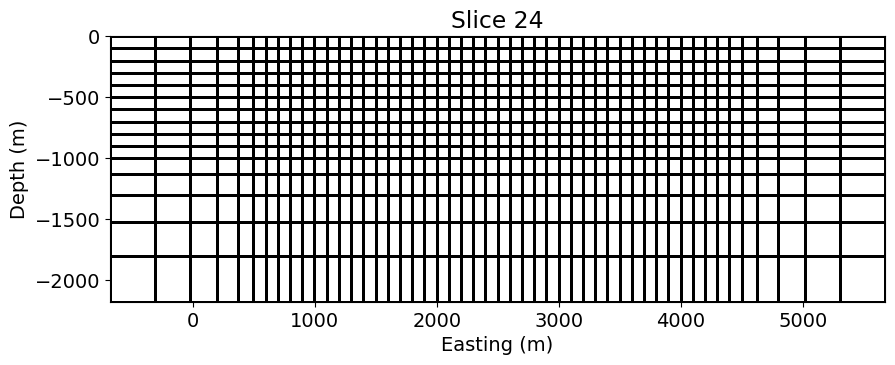

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mesh.plotSlice(np.ones(mesh.nC)*np.nan, ax=ax, grid=True, normal='Y')
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Depth (m)")
ax.set_aspect(1)

## Starting/Reference Model and Mapping on Tensor Mesh

Here, we would create starting and/or reference models for the inversion as
well as the mapping from the model space to the active cells. Starting and
reference models can be a constant background value or contain a-priori
structures. Here, the background is 1e-4 SI.




In [22]:
# Define background susceptibility model in SI. Don't make this 0!
# Otherwise the gradient for the 1st iteration is zero and the inversion will
# not converge.
background_susceptibility = 1e-4

# Find the indecies of the active cells in forward model (ones below surface)
from discretize.utils import active_from_xyz, mesh_builder_xyz, refine_tree_xyz
ind_active = active_from_xyz(mesh, np.c_[receiver_locations[:,:2], np.zeros(survey.nD)])

# Define mapping from model to active cells
nC = int(ind_active.sum())
model_map = maps.IdentityMap(nP=nC)  # model consists of a value for each cell

# Define starting model
starting_model = background_susceptibility * np.ones(nC)
reference_model = np.zeros(nC)

## Define the Physics

Here, we define the physics of the magnetics problem by using the simulation
class.




In [23]:
# Define the problem. Define the cells below topography and the mapping
simulation = magnetics.simulation.Simulation3DIntegral(
    survey=survey,
    mesh=mesh,
    model_type="scalar",
    chiMap=model_map,
    ind_active=ind_active,
)

## Define Inverse Problem

The inverse problem is defined by 3 things:

    1) Data Misfit: a measure of how well our recovered model explains the field data
    2) Regularization: constraints placed on the recovered model and a priori information
    3) Optimization: the numerical approach used to solve the inverse problem




In [27]:
# Define the data misfit. Here the data misfit is the L2 norm of the weighted
# residual between the observed data and the data predicted for a given model.
# Within the data misfit, the residual between predicted and observed data are
# normalized by the data's standard deviation.
dmis = data_misfit.L2DataMisfit(data=data_object, simulation=simulation)

# Define the regularization (model objective function)
reg = regularization.Sparse(
    mesh,
    active_cells=ind_active,
    mapping=model_map,
    reference_model=reference_model,
    gradientType="total",
    alpha_s=1,
    alpha_x=1,
    alpha_y=1,
    alpha_z=1,
)

# Define sparse and blocky norms ps, px, py, pz
ps = 1
px = 1
py = 1
pz = 1
reg.norms = [ps, px, py, pz]

# Define how the optimization problem is solved. Here we will use a projected
# Gauss-Newton approach that employs the conjugate gradient solver.
opt = optimization.ProjectedGNCG(
    maxIter=100, lower=0.0, upper=np.Inf, maxIterLS=20, maxIterCG=30, tolCG=1e-3
)

# Here we define the inverse problem that is to be solved
inv_prob = inverse_problem.BaseInvProblem(dmis, reg, opt)

## Define Inversion Directives

Here we define any directiveas that are carried out during the inversion. This
includes the cooling schedule for the trade-off parameter (beta), stopping
criteria for the inversion and saving inversion results at each iteration.




In [28]:
# Defining a starting value for the trade-off parameter (beta) between the data
# misfit and the regularization.
starting_beta = directives.BetaEstimate_ByEig(beta0_ratio=1)
beta_schedule = directives.BetaSchedule(coolingFactor=2, coolingRate=1)

# Options for outputting recovered models and predicted data as a dictionary
save_dictionary = directives.SaveOutputDictEveryIteration()

# Defines the directives for the IRLS regularization. This includes setting
# the cooling schedule for the trade-off parameter.
update_IRLS = directives.Update_IRLS(
    f_min_change=1e-3, max_irls_iterations=20, coolEpsFact=1.5, beta_tol=1e-2,
    chifact_target=1, chifact_start=1
)

# Updating the preconditionner if it is model dependent.
update_jacobi = directives.UpdatePreconditioner()

# Setting a stopping criteria for the inversion.
target_misfit = directives.TargetMisfit(chifact=1)

# Add sensitivity weights
sensitivity_weights = directives.UpdateSensitivityWeights(every_iteration=False)
opt.remember('xc')
# The directives are defined as a list.
directives_list = [
    sensitivity_weights,
    starting_beta,
    save_dictionary,
    update_IRLS,
    update_jacobi,
]

## Running the Inversion

To define the inversion object, we need to define the inversion problem and
the set of directives. We can then run the inversion.




In [29]:
# Here we combine the inverse problem and the set of directives
inv = inversion.BaseInversion(inv_prob, directives_list)

# Print target misfit to compare with convergence
# print("Target misfit is " + str(target_misfit.target))

# Run the inversion
recovered_model = inv.run(starting_model)


                    SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                    ***Done using the default solver SolverLU and no solver_opts.***
                    
Computing sensitivities to local ram
[########################################] | 100% Completed | 1.65 sms
model has any nan: 0
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  1.92e+01  3.24e+05  4.10e+00  3.24e+05    6.34e+05      0              
   1  9.62e+00  1.27e+05  2.29e+03  1.49e+05    2.77e+05      0              
   2  4.81e+00  7.35e+04  5.49e+03  1.00e+05    1.15e+05      0   Skip BFGS  
   3  2.41e+00  4.79e+04  9.22e+03  7.01e+04    9.38e+04      0   Skip BFGS  
   4  1.20e+00  2.95e+04  1.45e+04  4.69e+04    6.82e+04      0   Skip BFGS  
   5  6.01e-01  1.76e+04  2.15e

In [30]:
def plot_tikhonov_curve(iteration, scale):
    phi_d = []
    phi_m = []
    beta = []
    iterations = np.arange(len(save_dictionary.outDict)) + 1
    for kk in iterations:
        phi_d.append(save_dictionary.outDict[kk]['phi_d'])
        phi_m.append(save_dictionary.outDict[kk]['phi_m'])
        beta.append(save_dictionary.outDict[kk]['beta'])
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    axs[0].plot(phi_m ,phi_d, 'k.-')
    axs[0].plot(phi_m[iteration-1] ,phi_d[iteration-1], 'go', ms=10)
    axs[0].set_xlabel("$\phi_m$")
    axs[0].set_ylabel("$\phi_d$")
    axs[0].grid(True)

    axs[1].plot(iterations, phi_d, 'k.-')
    axs[1].plot(iterations[iteration-1], phi_d[iteration-1], 'go', ms=10)
    ax_1 = axs[1].twinx()
    ax_1.plot(iterations, phi_m, 'r.-')
    ax_1.plot(iterations[iteration-1], phi_m[iteration-1], 'go', ms=10)
    axs[1].set_ylabel("$\phi_d$")
    ax_1.set_ylabel("$\phi_m$")
    axs[1].set_xlabel("Iterations")
    axs[1].grid(True)
    axs[0].set_title(
        "$\phi_d$={:.1e}, $\phi_m$={:.1e}, $\\beta$={:.1e}".format(phi_d[iteration-1], phi_m[iteration-1], beta[iteration-1]),
        fontsize = 14
    )
    axs[1].set_title("Target misfit={:.0f}".format(survey.nD/2))
    for ii, ax in enumerate(axs):
        if ii == 0:
            ax.set_xscale(scale)
        ax.set_yscale(scale)
        xlim = ax.get_xlim()
        ax.hlines(survey.nD/2, xlim[0], xlim[1], linestyle='--', label='$\phi_d^{*}$')
        ax.set_xlim(xlim)
    axs[0].legend()
    plt.tight_layout()

In [35]:
interact(
    plot_tikhonov_curve,
    iteration=widgets.IntSlider(min=1, max=len(save_dictionary.outDict), step=1, continuous_update=False),
    scale=widgets.RadioButtons(options=["linear", "log"])
)

interactive(children=(IntSlider(value=1, continuous_update=False, description='iteration', max=33, min=1), Rad…

<function __main__.plot_tikhonov_curve(iteration, scale)>

In [36]:
susceptibility_model = save_dictionary.outDict[31]['m']

In [37]:
def plot_model_histogram(iteration, yscale):
    out = plt.hist(save_dictionary.outDict[iteration]['m'], bins=np.linspace(0, 0.1))
    plt.xlabel('Susceptibility (SI)')
    plt.yscale(yscale)
    plt.ylabel('Counts')
#     plt.ylim(10, 1e5)


In [38]:
interact(
    plot_model_histogram,
    iteration=widgets.IntSlider(min=1, max=len(save_dictionary.outDict), step=1),
    yscale=widgets.RadioButtons(options=["linear", "log"])
)

interactive(children=(IntSlider(value=1, description='iteration', max=33, min=1), RadioButtons(description='ys…

<function __main__.plot_model_histogram(iteration, yscale)>

In [39]:
def plot_dobs_vs_dpred(iteration):
    # Predicted data with final recovered model
    dpred = save_dictionary.outDict[iteration]['dpred']

    # Observed data | Predicted data | Normalized data misfit
    data_array = np.c_[dobs, dpred, (dobs - dpred) / standard_deviation]
    vmin, vmax = dobs.min(), dobs.max()
    fig = plt.figure(figsize=(17, 4))
    plot_title = ["Observed", "Predicted", "Normalized Misfit"]
    plot_units = ["nT", "nT", ""]

    ax1 = 3 * [None]
    ax2 = 3 * [None]
    norm = 3 * [None]
    cbar = 3 * [None]
    cplot = 3 * [None]
    v_lim = [(vmin, vmax), (vmin, vmax),(-3,3)]

    for ii in range(0, 3):

        ax1[ii] = fig.add_axes([0.33 * ii + 0.03, 0.11, 0.25, 0.84])
        cplot[ii] = plot2Ddata(
            receiver_list[0].locations,
            data_array[:, ii],
            ax=ax1[ii],
            ncontour=30,
            clim=v_lim[ii],
            contourOpts={"cmap": "Spectral_r"},
        )
        ax1[ii].set_title(plot_title[ii])
        ax1[ii].set_xlabel("x (m)")
        ax1[ii].set_ylabel("y (m)")

        ax2[ii] = fig.add_axes([0.33 * ii + 0.27, 0.11, 0.01, 0.84])
        norm[ii] = mpl.colors.Normalize(vmin=v_lim[ii][0], vmax=v_lim[ii][1])
        cbar[ii] = mpl.colorbar.ColorbarBase(
            ax2[ii], norm=norm[ii], orientation="vertical", cmap=mpl.cm.Spectral_r
        )
        cbar[ii].set_label(plot_units[ii], rotation=270, labelpad=15, size=12)
    for ax in ax1[1:]:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    plt.show()

In [41]:
interact(plot_dobs_vs_dpred, iteration=widgets.IntSlider(min=1, max=len(save_dictionary.outDict), step=1, value=1))

interactive(children=(IntSlider(value=1, description='iteration', max=33, min=1), Output()), _dom_classes=('wi…

<function __main__.plot_dobs_vs_dpred(iteration)>

In [43]:
def plot_recovered_model(iteration, xslice, yslice, zslice, vmax):
    fig = plt.figure(figsize=(10, 10))
    mesh.plot_3d_slicer(
        save_dictionary.outDict[iteration]['m'], clim=(0, vmax),
        xslice=xslice,
        yslice=yslice,
        zslice=zslice,
        fig=fig,
        pcolor_opts={'cmap':'Spectral_r'}
    )
interact(
    plot_recovered_model,
    iteration=widgets.IntSlider(min=1, max=len(save_dictionary.outDict), value=0),
    xslice=widgets.FloatText(value=2000, step=100),
    yslice=widgets.FloatText(value=41000, step=100),
    zslice=widgets.FloatText(value=-800, step=100),
    vmax=widgets.FloatText(value=0.07),
)

interactive(children=(IntSlider(value=1, description='iteration', max=33, min=1), FloatText(value=2000.0, desc…

<function __main__.plot_recovered_model(iteration, xslice, yslice, zslice, vmax)>

## Comparing the historic model with the recovered model


In [44]:
from discretize.utils import extract_core_mesh
zmin, zmax = -1500, 0
ymin, ymax = receiver_locations[:,1].min(), receiver_locations[:,1].max()
xmin, xmax = receiver_locations[:,0].min(), receiver_locations[:,0].max()
xyzlim = np.array([[xmin, xmax],[ymin, ymax], [zmin, zmax]])
inds_core, mesh_core = extract_core_mesh(xyzlim, mesh)

In [45]:
import pyvista as pv
def plot_3d_with_pyvista(model, notebook=True, threshold=0.04):
    pv.set_plot_theme("document")
    # Get the PyVista dataset of the inverted model
    dataset = mesh_core.to_vtk({'susceptibility':model})
    # Create the rendering scene
    p = pv.Plotter(notebook=notebook)
    # add a grid axes
    p.show_grid()
    # Extract volumetric threshold
    threshed = dataset.threshold(threshold, invert=False)
    # Add spatially referenced data to the scene
    dparams = dict(
        show_edges=False,
        cmap="Spectral_r",
        clim=[0, 0.07],
        stitle='Susceptibility (SI)',
    )
    p.add_mesh(threshed, **dparams)
    p.set_scale(1,1,1)
    cpos = [(-5248.506818695238, 35263.832232792156, 4945.734122744097),
     (2140.1554568144284, 40814.32410594353, -1198.9698078219635),
     (0.4274014723619113, 0.35262874486945933, 0.8324547733749025)]
    p.camera_position = cpos
    p.show(window_size=[1024, 768])

### Recovered susceptiblity model from L2-norm inversion

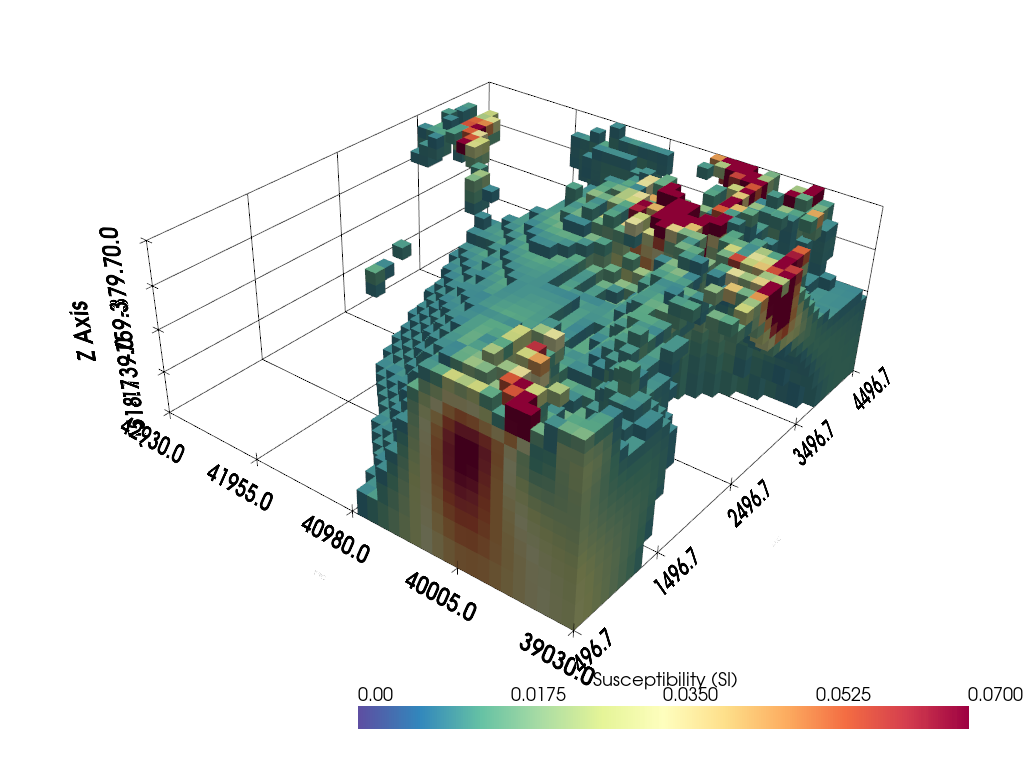

In [46]:
plot_3d_with_pyvista(inv_prob.l2model[inds_core], notebook=True, threshold=0.01)

### Recovered susceptiblity model from Lp-norm inversion

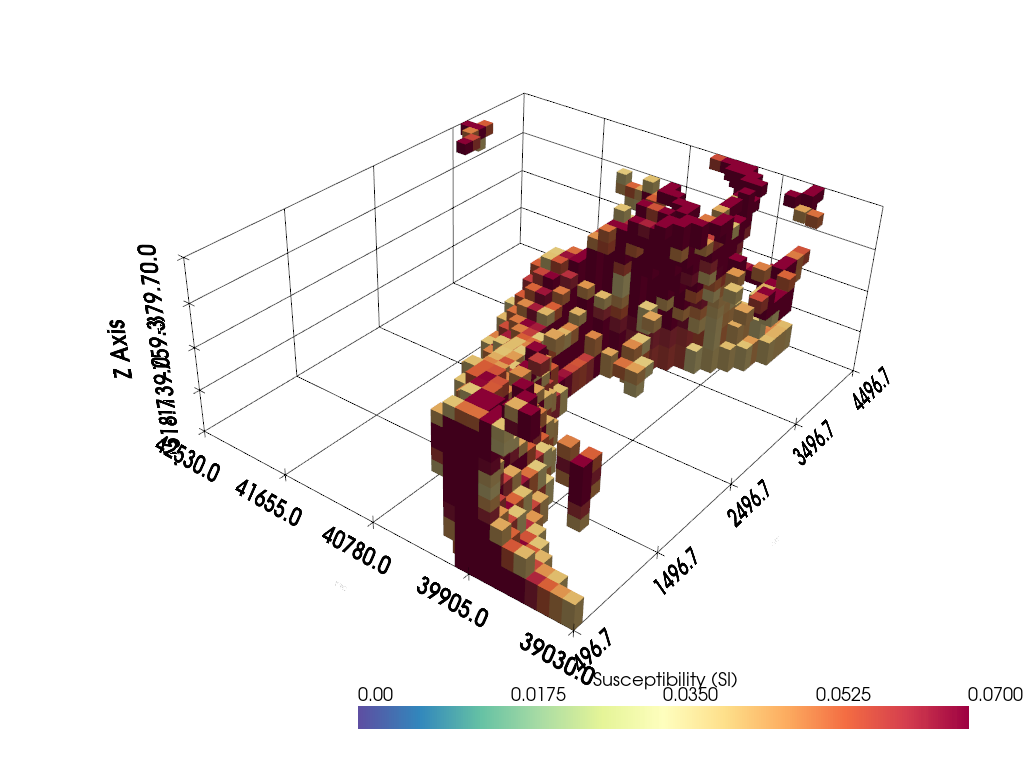

In [47]:
plot_3d_with_pyvista(susceptibility_model[inds_core], notebook=True, threshold=0.04)
